In [1]:
from data_storage import create_connection
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from stockstats import StockDataFrame
#from pandas_profiling import ProfileReport

In [2]:
connection = create_connection("../database/crypto_billionairs.db")

In [3]:
df = pd.read_sql_query('select * from ETHUSDT_5m_complete_history', connection)

In [4]:
df.head()

,open time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,1614556800000,1418.67,1428.17,1413.67,1414.77,4215.99347,1614557099999,5.995735e+06,4823,2090.04231,2.971696e+06,0
1,1614557100000,1414.77,1419.19,1409.91,1418.00,3775.48739,1614557399999,5.336616e+06,3855,2122.55630,2.999792e+06,0
2,1614557400000,1418.25,1422.00,1413.43,1421.99,2609.36133,1614557699999,3.696866e+06,2616,1341.07103,1.899618e+06,0
3,1614557700000,1422.00,1445.68,1421.58,1444.94,10711.71757,1614557999999,1.540127e+07,8424,5923.97507,8.518624e+06,0
4,1614558000000,1444.37,1448.59,1437.58,1442.60,4730.57675,1614558299999,6.828998e+06,4915,1962.46672,2.833183e+06,0


In [5]:
df["return"] = df['close'].pct_change() + 1 

In [6]:
#prof = ProfileReport(df)
#prof.to_file(output_file='data_profile.html')

No handles with labels found to put in legend.


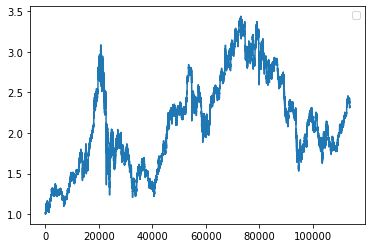

In [7]:
# Plot indexed returns.
plt.plot(np.cumprod(df["return"]))
plt.legend()
plt.show()

In [8]:
df.head()

,open time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,return
0,1614556800000,1418.67,1428.17,1413.67,1414.77,4215.99347,1614557099999,5.995735e+06,4823,2090.04231,2.971696e+06,0,NaN
1,1614557100000,1414.77,1419.19,1409.91,1418.00,3775.48739,1614557399999,5.336616e+06,3855,2122.55630,2.999792e+06,0,1.002283
2,1614557400000,1418.25,1422.00,1413.43,1421.99,2609.36133,1614557699999,3.696866e+06,2616,1341.07103,1.899618e+06,0,1.002814
3,1614557700000,1422.00,1445.68,1421.58,1444.94,10711.71757,1614557999999,1.540127e+07,8424,5923.97507,8.518624e+06,0,1.016139
4,1614558000000,1444.37,1448.59,1437.58,1442.60,4730.57675,1614558299999,6.828998e+06,4915,1962.46672,2.833183e+06,0,0.998381


In [9]:
df_ti = pd.DataFrame()
df_ti["open_time"] = df["open time"]
df_ti["open"] = df["open"]
df_ti["close"] = df["close"]
df_ti["high"] = df["high"]
df_ti["low"] = df["low"]
df_ti["volume"] = df["volume"]
df_ti["amount"] = df["quote_asset_volume"]

In [10]:
stock = StockDataFrame.retype(df_ti)

In [11]:
df["moving_average_convergence_divergence"] = stock.get("macd")

In [12]:
df["moving_average_convergence_divergence"] = df["moving_average_convergence_divergence"].astype(int)

In [13]:
def momentum(df, lag):
    return df.pct_change(periods=lag)

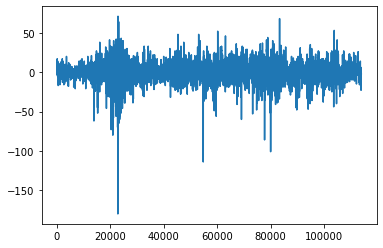

In [14]:
plt.plot(df["moving_average_convergence_divergence"])
plt.show()

In [15]:
df["momentum168"] = momentum(df["close"], 2016)

In [16]:
df.to_sql("ETHUSDT_5m_complete_history_short", connection, if_exists="replace")

C:\Users\janfa\anaconda3\lib\site-packages\pandas\core\generic.py:2653: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


### Short indicator analysis

In [17]:
df_momentum168 = pd.DataFrame()
df_momentum168["moving_average_convergence_divergence"] = df["moving_average_convergence_divergence"].shift(2016)
df_momentum168["momentum168"] = df["momentum168"]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_momentum168.groupby("moving_average_convergence_divergence").mean())#.where(df_momentum168.groupby("moving_average_convergence_divergence").mean() <= 0))

,momentum168
moving_average_convergence_divergence,
-180.0,0.316153
-174.0,0.452679
-159.0,0.142296
-147.0,0.178604
-144.0,0.265022
-135.0,0.172559
-134.0,0.311190
-114.0,0.016843
-112.0,-0.006572


### Application of analysis

In [18]:
short_signals1 = df.index[df["moving_average_convergence_divergence"] >= 55].tolist()
short_signals = short_signals1

In [19]:
df["short_signals"] = 0
df["short_signals"].loc[short_signals] = 1

C:\Users\janfa\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
df["short_close_signals"] = 0
df["short_close_signals"] = df["short_signals"].shift(2016)

In [21]:
buy_colors = []
for value in df["short_signals"]:
    if value == 1:
        buy_colors.append("r")
    else:
        buy_colors.append("None")

In [22]:
sell_colors = []
for value in df["short_close_signals"]:
    if value == 1:
        sell_colors.append("g")
    else:
        sell_colors.append("None")

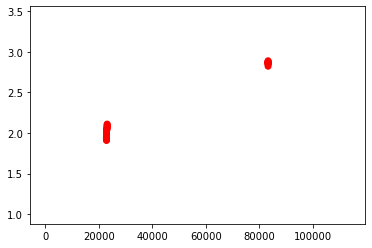

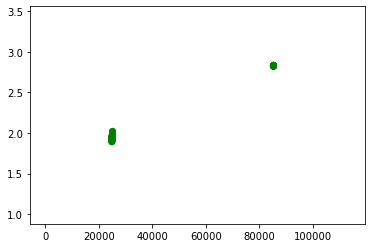

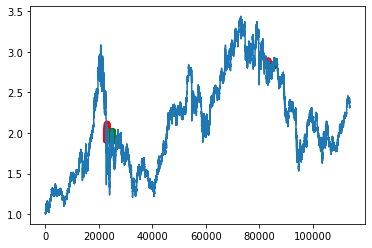

In [23]:
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=buy_colors)
plt.show()
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=sell_colors)
plt.show()
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=buy_colors)
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=sell_colors)
plt.plot(np.cumprod(df["return"]))
plt.show()

In [24]:
df.to_sql("ETHUSDT_5m_complete_history_short", connection, if_exists="replace")

C:\Users\janfa\anaconda3\lib\site-packages\pandas\core\generic.py:2653: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [25]:
df.head()

,open time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,return,moving_average_convergence_divergence,momentum168,short_signals,short_close_signals
0,1614556800000,1418.67,1428.17,1413.67,1414.77,4215.99347,1614557099999,5.995735e+06,4823,2090.04231,2.971696e+06,0,NaN,0,NaN,0,NaN
1,1614557100000,1414.77,1419.19,1409.91,1418.00,3775.48739,1614557399999,5.336616e+06,3855,2122.55630,2.999792e+06,0,1.002283,0,NaN,0,NaN
2,1614557400000,1418.25,1422.00,1413.43,1421.99,2609.36133,1614557699999,3.696866e+06,2616,1341.07103,1.899618e+06,0,1.002814,0,NaN,0,NaN
3,1614557700000,1422.00,1445.68,1421.58,1444.94,10711.71757,1614557999999,1.540127e+07,8424,5923.97507,8.518624e+06,0,1.016139,1,NaN,0,NaN
4,1614558000000,1444.37,1448.59,1437.58,1442.60,4730.57675,1614558299999,6.828998e+06,4915,1962.46672,2.833183e+06,0,0.998381,1,NaN,0,NaN
